# 6 APRIL ASSIGNMENT

Q1. What is the mathematical formula for a linear SVM?

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for classification or regression tasks. The mathematical formula for a linear SVM is as follows:

For a binary classification problem, where we have two classes, represented by -1 and 1 respectively:

minimize:
1/2 * ||w||^2

subject to:
y_i * (w^T * x_i + b) >= 1 for i = 1, 2, ..., n

where

w is the weight vector
b is the bias or intercept term
x_i is the ith input vector
y_i is the ith output or target value
n is the number of training samples
||w|| is the Euclidean norm of the weight vector

Q2. What is the objective function of a linear SVM?

A linear SVM's goal function is to maximise the difference between two classes of data. The margin is defined as the distance between the decision border (the hyperplane separating the two classes) and the nearest data points from each class.

The objective function of a linear SVM is to minimise 1/2 times the squared norm of the weight vector, with the constraint that each data point is properly categorised with a margin of at least 1. This may be expressed mathematically as:

The goal of the optimisation issue is to find the weight vector w and bias term b that minimise the norm of w while meeting the margin restriction for each data point. We may maximise the gap between the two classes by minimising the norm of w, which leads to greater generalisation performance on unseen data.


Q3. What is the kernel trick in SVM?

The kernel trick is a Support Vector Machines (SVM) approach for dealing with non-linearly separable data by implicitly transferring the input data into a higher-dimensional feature space where the data may become linearly separable. This eliminates the need to explicitly compute the mapping, which in high-dimensional or infinite-dimensional feature spaces may be computationally costly or even impossible.

The input data is mapped into the feature space using a kernel function that computes the dot product between pairs of data points in the feature space without actually performing the mapping in the kernel technique. The kernel function is a similarity function that compares the similarity of two feature space data points. The linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel are the most often utilised kernel functions.

In the feature space, the decision boundary is defined as a linear combination of the kernel functions evaluated at the training data points. The weight vector is then calculated using an optimisation approach that maximises the margin between the two classes while keeping the kernel function and the margin constraint in mind. The decision function for a new data point is then constructed by combining the kernel function evaluated at the new data point and the support vectors, which are training data points that are on or near the margin.

The kernel approach enables SVMs to handle non-linearly separable data without explicitly computing the mapping to a higher-dimensional feature space, saving computation time and avoiding the "curse of dimensionality" problem. It also enables SVMs to deal with infinite-dimensional feature spaces, which may be necessary in some applications such as text classification and picture recognition.


Q4. What is the role of support vectors in SVM Explain with example

The support vectors in Support Vector Machines (SVMs) are the training data points that are on or within the margin, which is the area that divides the two classes of data. The support vectors are utilised to categorise fresh data points and play an important role in setting the SVM's decision boundary.

The significance of support vectors stems from the fact that they define the SVM's margin. The distance between the decision border and the nearest data points from each class is specified as the margin. The decision boundary is determined by optimising an objective function that maximises the margin while requiring that all data points be accurately categorised.

The support vectors are the data points that are on or near the decision border, implying that they have the most effect on it. They are the SVM's most relevant data points and are used to build the decision boundary, which is a linear combination of the kernel functions evaluated at the support vectors.



Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

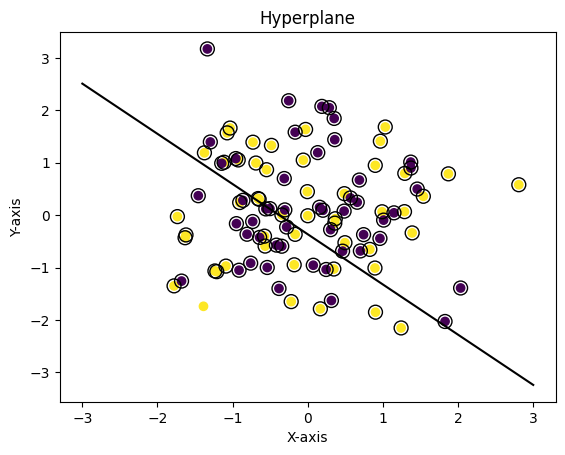

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

X = np.random.randn(100, 2)
y = np.concatenate((np.ones(50), -np.ones(50)))

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

w = clf.coef_[0]
b = clf.intercept_[0]
xp = np.linspace(-3, 3, 100)
yp = - (w[0]*xp + b) / w[1]
plt.plot(xp, yp, 'k-')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("Hyperplane")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


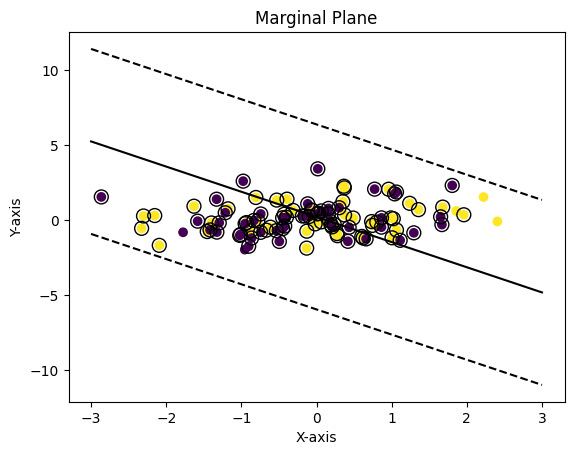

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm


X = np.random.randn(100, 2)
y = np.concatenate((np.ones(50), -np.ones(50)))

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

w = clf.coef_[0]
b = clf.intercept_[0]
xp = np.linspace(-3, 3, 100)
yp = - (w[0]*xp + b) / w[1]
margin = 1 / np.sqrt(np.sum(w**2))
lower_margin = yp - margin / w[1]
upper_margin = yp + margin / w[1]
plt.plot(xp, yp, 'k-')
plt.plot(xp, lower_margin, 'k--')
plt.plot(xp, upper_margin, 'k--')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("Marginal Plane")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


Q6. SVM Implementation through Iris dataset.

~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl

~ Train a linear SVM classifier on the training set and predict the labels for the testing setl

~ Compute the accuracy of the model on the testing setl

~ Plot the decision boundaries of the trained model using two of the featuresl

~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [21]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


In [23]:
from sklearn.metrics import accuracy_score
# Try different values of the regularisation parameter C and see how it affects the performance of the model
for c in [0.1, 1, 10]:
    clf = SVC(kernel='linear', C=c)
    clf.fit(X_train[:, [0, 2]], y_train)
    y_pred = clf.predict(X_test[:, [0, 2]])
    acc = accuracy_score(y_test, y_pred)
    print("C:", c, "Accuracy:", acc)

C: 0.1 Accuracy: 1.0
C: 1 Accuracy: 1.0
C: 10 Accuracy: 0.9777777777777777
